In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
# Add column cell_num to the DataFrame
cell_num = [32000, 16000, 8000, 4000, 2000, 1000, 500, 250, 125, 62.5]

In [66]:
def plot_fluo_vs_cell_num(file_path, cell_line_num, cell_num, cell_line_name):

    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel(file_path)

    # Subset the DataFrame to include only the plate readings
    plate_only_df = df.iloc[10:16, 2:12]

    if cell_line_num == 1:
        cell_line = plate_only_df.iloc[0:3, :]
    elif cell_line_num == 2:
        cell_line = plate_only_df.iloc[3:6, :]
    
    # Rename rows of cell_line_1
    cell_line.index = ['A', 'B', 'C']
    cell_line_rotated = cell_line.transpose()
    cell_line_rotated['cell_num'] = cell_num
    cell_line_long = cell_line_rotated.melt(id_vars=['cell_num'], var_name='replicate', value_name='fluorescence')
    cell_line_long['cell_num'] = pd.to_numeric(cell_line_long['cell_num'], errors='coerce')
    cell_line_long['fluorescence'] = pd.to_numeric(cell_line_long['fluorescence'], errors='coerce')

    # Transform cell_num to log2 scale
    cell_line_long['log2_cell_num'] = round(np.log2(cell_line_long['cell_num']))
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='log2_cell_num', y='fluorescence', data=cell_line_long)
    plt.title('Alamar blue fluorescence ' + cell_line_name)
    plt.xlabel('log2(cell_num)')
    plt.ylabel('Fluorescence')
    plt.xticks(rotation=45)
    plt.show()

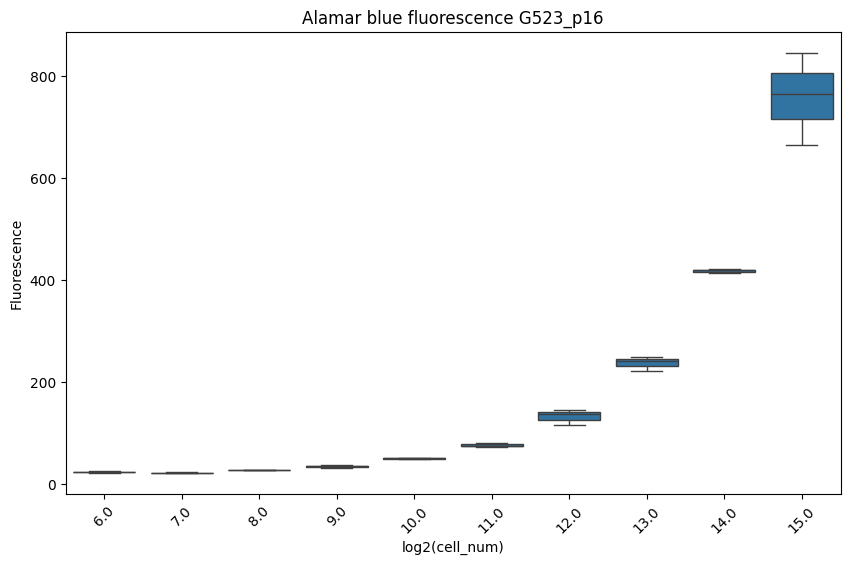

In [67]:
plot_fluo_vs_cell_num('C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Jul Thu 11 2024 16-07-55-6759261.xlsx', 1, cell_num, 'G523_p16')

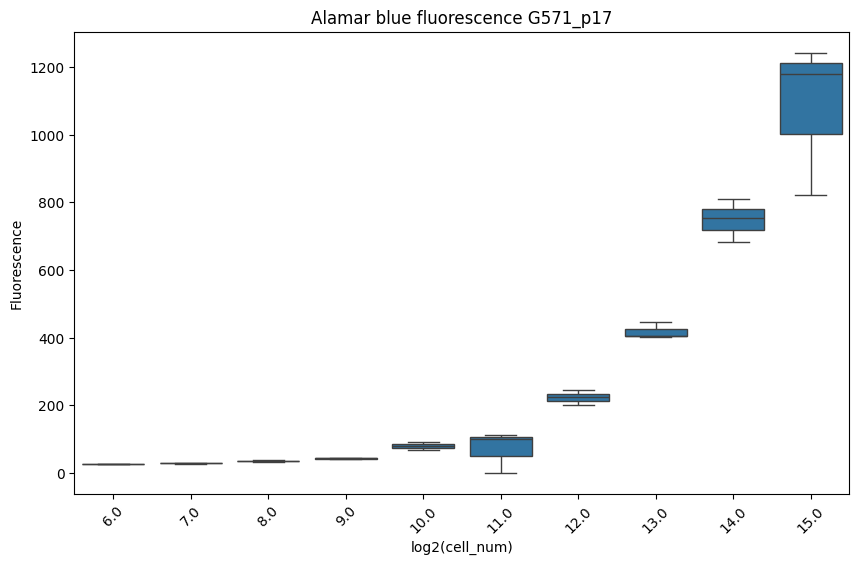

In [68]:
plot_fluo_vs_cell_num('C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Jul Thu 11 2024 16-07-55-6759261.xlsx', 2, cell_num, 'G571_p17')

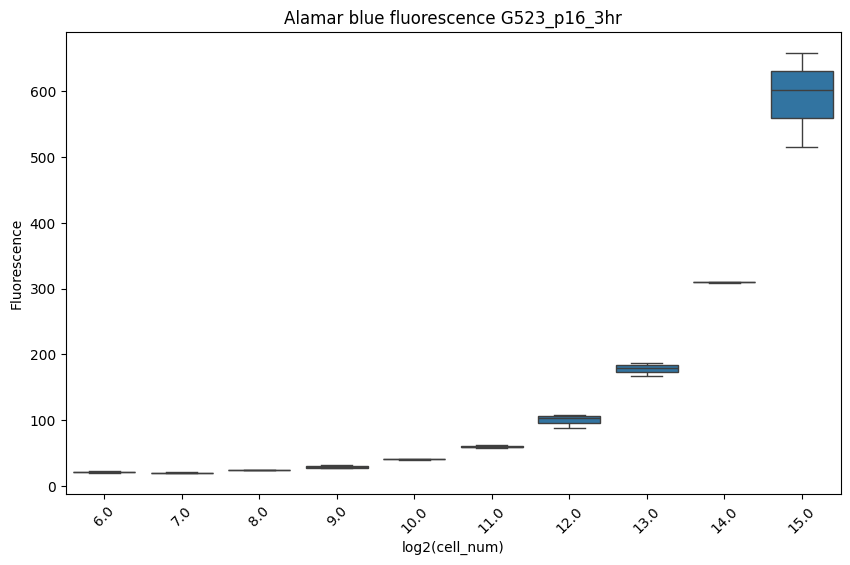

In [69]:
plot_fluo_vs_cell_num('C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Jul Thu 11 2024 16-09-18-6340866.xlsx', 1, cell_num, 'G523_p16_3hr')

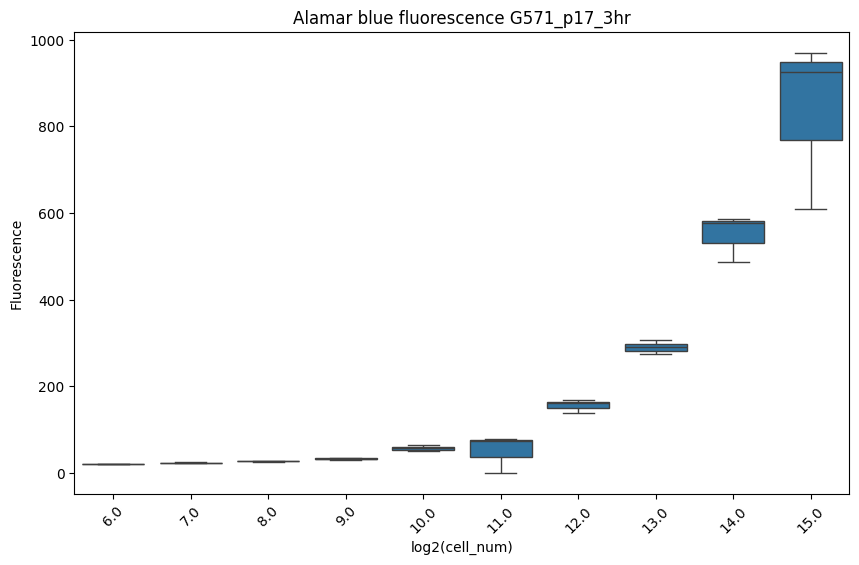

In [70]:
plot_fluo_vs_cell_num('C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Jul Thu 11 2024 16-09-18-6340866.xlsx', 2, cell_num, 'G571_p17_3hr')